In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import arange
import math

import seaborn as sns
sns.set_style("white")

import scipy as sp
from scipy import linalg, optimize

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import collections
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.dates import DateFormatter

import calendar
import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp

In [2]:
# import cleaned datasets
ufoweekly = pd.read_csv('../Data/Datasets/cleandate_weekly_reval.csv',index_col = 0)
ufoyearly = pd.read_csv('../Data/Datasets/yearly_ufopct_entrtm.csv',index_col = 0)
ufo = pd.read_csv('../Data/ufo_clean.csv', index_col = 0)

In [3]:
# plot ufo weekly - assign week and year cols, sort and update df
#ufoweekly['year'] = pd.to_datetime(ufoweekly['week_id'].astype(str).str[:4]).dt.year
#ufoweekly['week_of_year'] = ufoweekly['week_id'].astype(str).str[-2:].astype(int)
#ufoweekly['week_of_year'] = np.abs(ufoweekly['week_of_year']#)

In [4]:
# sort vals, update and review
ufoweekly = ufoweekly.sort_values(['startdateweek'])
ufoweekly.head()

,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id
763,2006-01-08,3,0.638298,2006,1,1,2006-1
758,2006-01-15,8,1.702128,2006,1,2,2006-2
759,2006-01-22,6,1.276596,2006,1,3,2006-3
757,2006-01-29,8,1.702128,2006,1,4,2006-4
764,2006-02-05,2,0.425532,2006,2,5,2006-5


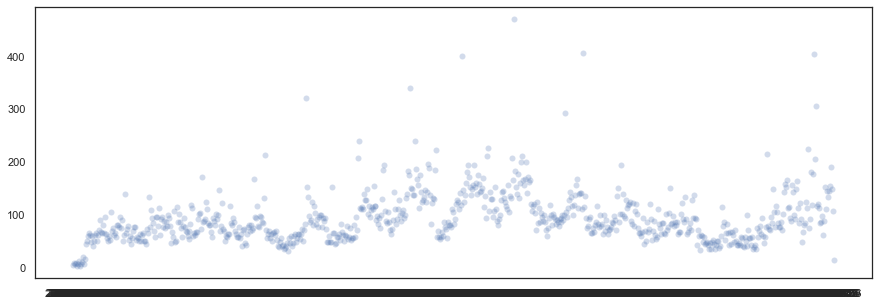

In [5]:
# plot1: weekly ufo count 

sns.set(style="white")
sns.cubehelix_palette(start=.5, rot=-.5)

fig, ax = plt.subplots(figsize=(15,5))
  
fig1 = plt.scatter(ufoweekly.startdateweek, ufoweekly.weekly_ufocount, alpha=0.25, linewidths=0)
   
#ax.fmt_xdata = DateFormatter('%Y-%w')

#fig.autofmt_xdate()

plt.show()

In [6]:
#sns.cubehelix_palette(start=.5, rot=-.5)
#sns.relplot(x="week_id", y="weekly_ufocount", hue="year", kind="line", data=ufoweekly, aspect=12/6);


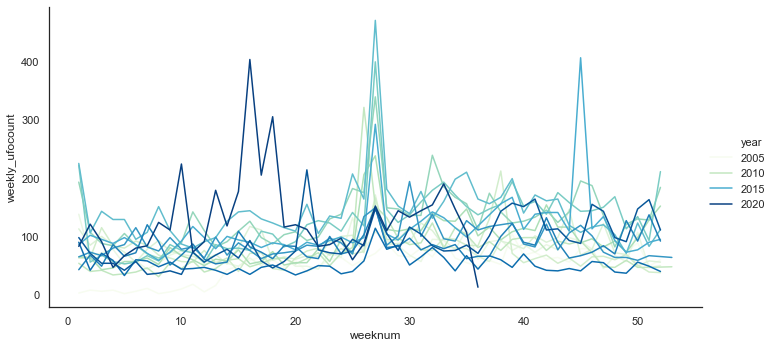

In [7]:
#sns.cubehelix_palette(start=.5, rot=-.5)
sns.relplot(x="weeknum", y="weekly_ufocount", hue="year", kind="line", data=ufoweekly, aspect=12/6,palette='GnBu');


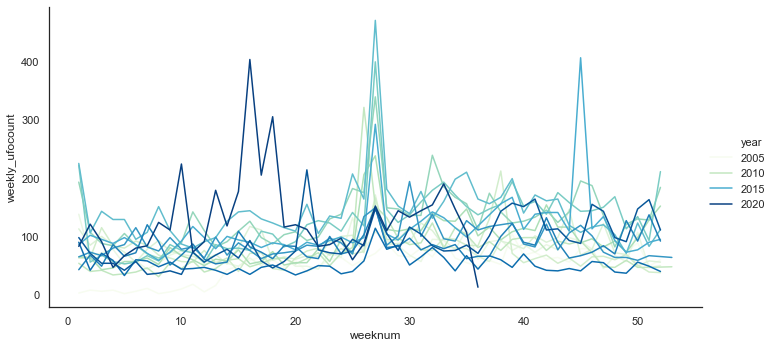

In [7]:
#sns.cubehelix_palette(start=.5, rot=-.5)
sns.relplot(x="weeknum", y="weekly_ufocount", hue="year", kind="line", data=ufoweekly, aspect=12/6,palette='GnBu');


In [25]:
weekplotdf2.head()

,index,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id
0,763,2006-01-08,3,0.638298,2006,1,1,2006-1
1,756,2006-03-12,10,2.127660,2006,3,10,2006-10
2,752,2006-03-19,18,3.829787,2006,3,11,2006-11
3,761,2006-03-26,5,1.063830,2006,3,12,2006-12
4,753,2006-04-02,16,3.404255,2006,4,13,2006-13


In [42]:
# making a copy df to plot, sort, reset_index and update
weekplotdf2 = ufoweekly.copy()
weekplotdf2 = weekplotdf2.sort_values('week_id').reset_index()

# only interesting years
chosenyears = [2006,2010,2015,2020]
dfyears = pd.DataFrame(weekplotdf2.loc[weekplotdf2['year'].isin(chosenyears)])
dfyears.head()
#dfyears.value_counts()
#weekplotdf2.dtypes

,index,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id
0,763,2006-01-08,3,0.638298,2006,1,1,2006-1
1,756,2006-03-12,10,2.127660,2006,3,10,2006-10
2,752,2006-03-19,18,3.829787,2006,3,11,2006-11
3,761,2006-03-26,5,1.063830,2006,3,12,2006-12
4,753,2006-04-02,16,3.404255,2006,4,13,2006-13


No handles with labels found to put in legend.


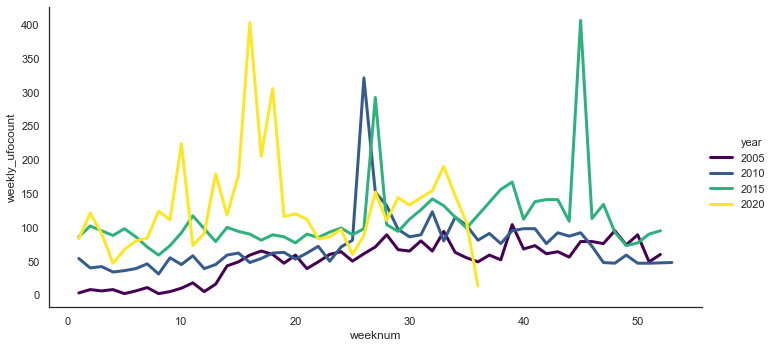

In [56]:
# plot2-2:

sns.set_context(font_scale=3, rc={"lines.linewidth": 3})
  
sns.relplot(x="weeknum", y="weekly_ufocount", hue="year", kind="line", data=dfyears, aspect=20/10, palette='viridis');

ax.set(xlabel="Week of Year", ylabel = "Weekly UFO Counts")

ax.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))

#ax.set_xlabel('X_axi',fontsize=20);
#ax.set_ylabel('Y_axis',fontsize=20);


In [41]:
dfyears.year.value_counts()

2015    52
2010    52
2020    36
Name: year, dtype: int64

In [37]:
# making a copy df to plot, sort, reset_index and update
weekplotdf2 = ufoweekly.copy()
weekplotdf2 = weekplotdf2.sort_values('week_id').reset_index()
weekplotdf2['yearstring'] = weekplotdf2['year'].astype(str)

# only interesting years
chosenyears = ['2005','2010','2015','2020']

dfyears = pd.DataFrame(weekplotdf2.loc[weekplotdf2['yearstring'].isin(chosenyears)])
dfyears.head()
#dfyears.value_counts()
#weekplotdf2.dtypes

,index,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id,yearstring
208,651,2010-01-10,54,11.489362,2010,1,1,2010-1,2010
209,704,2010-03-14,45,9.574468,2010,3,10,2010-10,2010
210,616,2010-03-21,58,12.340426,2010,3,11,2010-11,2010
211,738,2010-03-28,39,8.297872,2010,3,12,2010-12,2010
212,708,2010-04-04,45,9.574468,2010,4,13,2010-13,2010
